# MULTICLASS CLASSIFICATION 



In [1]:
#importing libraries
#__Nothing_to_change_here__

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.fashion_mnist.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_test,Y_test,test_size=0.2)

In [3]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(8000, 28, 28)
(8000,)
(2000, 28, 28)
(2000,)


In [4]:
#print the unique values in Y_train
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

<Figure size 2500x2500 with 0 Axes>

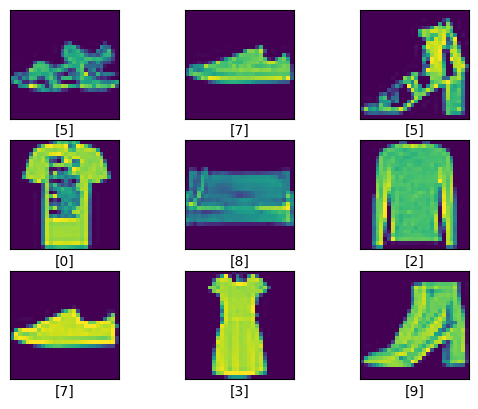

In [5]:

#randomly print 9 images with label
#edit the 2 lines of the code snippet

import random
figure = plt.figure(figsize=(25,25))
plt.figure()
for i in range(9):
  # index = random.randint(0,len(X_train)-1) # showing the index_th image
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i])
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel([Y_train[i]]) 
plt.show()  
  


###These number denotes the respective object
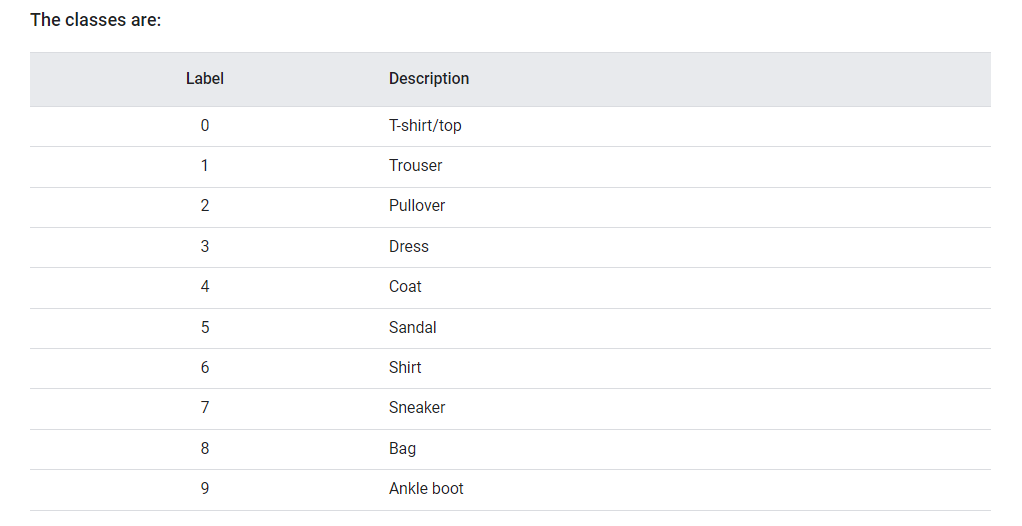

In [6]:
# Find the count of each type of class
classes = [0,0,0,0,0,0,0,0,0,0]
for i in Y_train:
  classes[i]+=1
for k in Y_test:
  classes[i]+=1
classes


[822, 801, 803, 815, 809, 796, 784, 798, 781, 2791]

In [7]:
# model initialization
model = tf.keras.Sequential()

# adding the 1st and 2nd layer layer 
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))


#__add__ additional Intermediate Dense layers here to create the output
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))



#__output__layer with correct output shape and activation function[ google if finding this difficult to get]
model.add(tf.keras.layers.Dense(10,activation='softmax'))


In [8]:
# Compiling the model
#add the lr and loss in the given space

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
                  ,metrics=['accuracy'])

In [9]:
#Lets analyse the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 107,370
Trainable params: 107,370
Non-trainable params: 0
_________________________________________________________________


###What is the number of trainable parameters in the model?

In [10]:
""" 
[objective] Write the answer here:  107,370
"""

' \n[objective] Write the answer here:  111,146       2,378,826\n'

In [11]:
#lets train the model
#pass correct argument at the comment's place

history = model.fit(X_train,Y_train,epochs=10,verbose=1, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


200/200 [==============================] - 3s 9ms/step - loss: 6.4865 - accuracy: 0.4356 - val_loss: 1.4924 - val_accuracy: 0.5319
Epoch 2/10
200/200 [==============================] - 2s 11ms/step - loss: 1.3725 - accuracy: 0.5691 - val_loss: 1.3290 - val_accuracy: 0.6175
Epoch 3/10
200/200 [==============================] - 2s 9ms/step - loss: 1.2476 - accuracy: 0.6131 - val_loss: 1.2949 - val_accuracy: 0.6194
Epoch 4/10
200/200 [==============================] - 1s 7ms/step - loss: 1.0666 - accuracy: 0.6416 - val_loss: 0.9969 - val_accuracy: 0.6800
Epoch 5/10
200/200 [==============================] - 2s 8ms/step - loss: 0.8442 - accuracy: 0.7094 - val_loss: 0.8851 - val_accuracy: 0.6975
Epoch 6/10
200/200 [==============================] - 1s 6ms/step - loss: 0.7662 - accuracy: 0.7230 - val_loss: 0.8521 - val_accuracy: 0.6925
Epoch 7/10
200/200 [==============================] - 1s 7ms/step - loss: 0.7224 - accuracy: 0.7352 - val_loss: 0.8493 - val_accuracy: 0.6869
Epoch 8/10
200/2

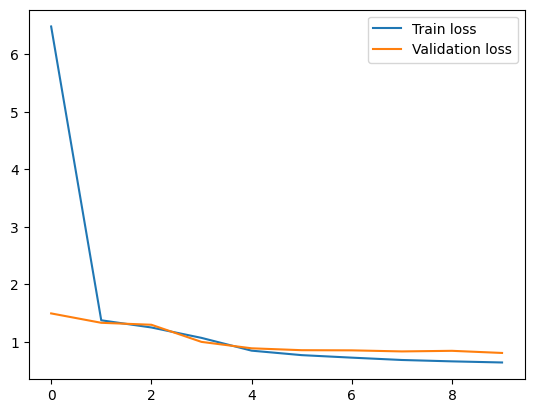

In [12]:
#lets plot the losses

plt.plot(history.history['loss'],label="Train loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()

###What do you infer from the graph of losses above?

In [13]:
"""
[Under 100 words] Write your answer here: 
as the number of epoches increaces the loss is getting minimised 
but this is an indication of overfittig of data 
since there is a gap between validation and training data 
the model doesnt work that good for new data.
"""

'\n[Under 100 words] Write your answer here: \nas the number of epoches increaces the loss is getting minimised and \n'

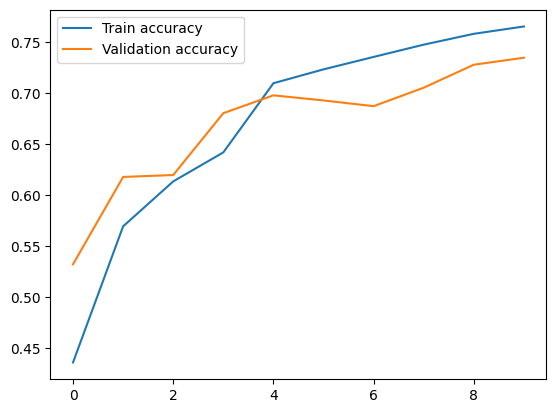

In [14]:
#plotting the accuracy of the traing

plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

###What do you infer from the graph of accuracies above?

In [15]:
"""
[Under 100 words] Write your answer here:
both trianing and validation accuracies are increasing which is a good indication as the model is learning to generalize data for unseen data as well. 
"""

'\n[Under 100 words] Write your answer here:\n\n'

In [16]:
#Checking the prediction

Y_predicted = model.predict(X_test)


63/63 [==============================] - 0s 2ms/step


In [17]:
# Calculate the R2score for the test data
from sklearn.metrics import r2_score

Y_predicted_xyz = np.argmax(Y_predicted, axis=1)

r2score = r2_score(Y_test, Y_predicted_xyz)
print("R2Score:", r2score)


R2Score: 0.6326958005079447


In [18]:
# Let's see the kernel(weights) of the layers
model.layers[1].kernel.shape

TensorShape([784, 128])

In [19]:
# print the shape of kernel of other layers as well
kernel_shape = model.layers[1].kernel.shape
print("Kernel shape:", kernel_shape)

Kernel shape: (784, 128)


In [20]:
# Does that satisfied the matrix multiplication math discussed earlier

In [20]:
"""No, To perform matrix multiplication,we need to access the weights using the get_weights() method of layer and perform the matrix multiplication manually."""